# WELCOME TO THE YOUTUBE SCRAPER USING BS4 

Hello All, I will show you all how to scrape youtube and display the video in the Notebook itself. Also, we can store the details in the excel for further use.
Before Scraping any website, go through their terms and conditional.

## To Import the Needed Library


In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen, Request
from selenium import webdriver
import pandas as pd
from IPython.display import IFrame, YouTubeVideo
from webdriver_manager.chrome import ChromeDriverManager
import os

## Scraper Functions

In [2]:
def youtube_scraper(inp):
    
    Search = '+'.join(inp.split())
    
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (2)\chromedriver.exe')
    driver.get('https://www.youtube.com/results?search_query='+Search)
    html = driver.page_source
    soup = BeautifulSoup(html)
    search = soup.find('body', dir='ltr')
    first_content = soup.find('div', id='content')
        
    link,name,channel=[],[],[]
    
    for i,second_content in enumerate (first_content.find_all('div', class_='text-wrapper style-scope ytd-video-renderer')):
        try:

            third_content=second_content.find('h3', class_='title-and-badge style-scope ytd-video-renderer')

            # To get the link of the song
            link.append(('https://www.youtube.com'+(third_content.a)['href']).strip())


            # To get the name of the song
            k=third_content.a.text.strip()
            name.append(k)

            # To get the channel details of the songs
            channel.append(second_content.find('div', class_='hidden style-scope paper-tooltip').text.strip())
            
            if i>10:
                    break

        except:
            pass
    dic={'Name of the Songs': name, 'Channel': channel, 'Links':link}   
    print ('\n')
    print ('\033[1m' + 'These are the top 5 searches from youtube for your search'.center(50))
    driver.close()
    return dic

In [3]:
inp=input('enter the songs to play from youtube - it takes some time to show the result: ')
df= pd.DataFrame(youtube_scraper(inp))
df.head()

enter the songs to play from youtube - it takes some time to show the result: Alan Walker Faded Song


These are the top 5 searches from youtube for your search


,Name of the Songs,Channel,Links
0,Alan Walker - Faded,Alan Walker,https://www.youtube.com/watch?v=60ItHLz5WEA
1,Alan Walker - Faded (Live Performance),Alan Walker,https://www.youtube.com/watch?v=mIxlvVlOIS0
2,Alan Walker - Faded (Lyrics),7clouds,https://www.youtube.com/watch?v=qdpXxGPqW-Y
3,Faded - Alan Walker (Lyrics),DopeLyrics,https://www.youtube.com/watch?v=reuYXbHOc1c
4,Alan Walker - Faded (Where are you now) Lyrics,Best song lyrics,https://www.youtube.com/watch?v=dnZItt33cvI


## To save the dataframe into HDF Format and CSV format

In [4]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5');
hdf.put(inp,df,format='table', data_columns=True);
df.to_csv(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv',mode='a');

C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Alan Walker Faded Song'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs_kind'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object;

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\jpravijo\\Desktop\\Anaconda\\youtube.csv'

## Choose the Scraped data to play the songs

please select the songs by choosing the indexes (e.g) 0,1,2,3,4
1


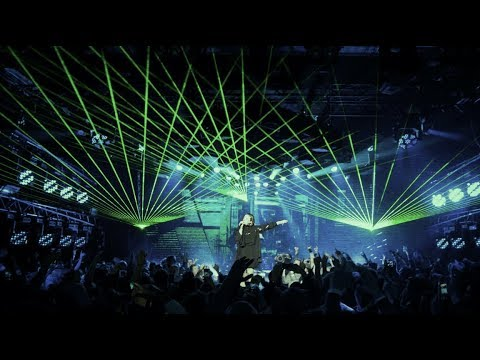

In [5]:
print('\033[1m'+"please select the songs by choosing the indexes (e.g) 0,1,2,3,4")
song_input=int(input())
YouTubeVideo(df.loc[song_input, 'Links'].split('=')[1], width=800, height=600)

## To Open the CSV which contains the Dataframe

In [7]:
os.startfile(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv')

## To Open the HDF which contains the Dataframe

In [8]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5')
hdf.keys()

['/Alan Walker Faded',
 '/Alan Walker Faded song',
 '/dusk to dawn',
 '/dusk to dawn song',
 '/martin garrix ',
 '/martin garrix top 5 songs',
 '/martin garrix top songs',
 '/matin garrix animals songs',
 '/rowdy baby songs',
 '/sia cheap trills']

In [10]:
hdf.get('/Alan Walker Faded song')

,Name of the Songs,Channel,Links
0,Alan Walker - Faded,Alan Walker,https://www.youtube.com/watch?v=60ItHLz5WEA
1,Alan Walker - Faded (Live Performance),Alan Walker,https://www.youtube.com/watch?v=mIxlvVlOIS0
2,Alan Walker - Faded (Lyrics),7clouds,https://www.youtube.com/watch?v=qdpXxGPqW-Y
3,Faded - Alan Walker (Lyrics),DopeLyrics,https://www.youtube.com/watch?v=reuYXbHOc1c
4,Alan Walker - Faded (Where are you now) Lyrics,Best song lyrics,https://www.youtube.com/watch?v=dnZItt33cvI
5,Alan Walker - Faded (Reworks),Hidden Book,https://www.youtube.com/watch?v=avytvFalI6o
6,ALAN WALKER – Faded / Different World feat. Ju...,KKBOX,https://www.youtube.com/watch?v=n03IDJcsy5g
7,"Alan Walker, Sabrina Carpenter & Farruko - On...",Alan Walker,https://www.youtube.com/watch?v=dhYOPzcsbGM
8,New Songs Alan Walker 2019 - Top 20 Alan Walke...,Listen To Music,https://www.youtube.com/watch?v=WWCsGEarExg
9,Alan Walker - Faded,Conor Maynard,https://www.youtube.com/watch?v=IgCphQCkHSk


THANK YOU 